<a href="https://colab.research.google.com/github/Amolkale01/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [65]:
# import required modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import plotly 
import plotly.express as px

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
# Path of the raw dataset of Hotel Booking
data_path = '/content/drive/MyDrive/Capston Project Hotel Booking Analysis/Copy of Hotel Bookings.csv'

# **Exploring the dataset**

In [68]:
# Loading the dataset
hotel_booking_raw_ds = pd.read_csv(data_path)
hotel_booking_raw_ds

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [69]:
# creating a copy of the dataset
ds = hotel_booking_raw_ds

ds.head()



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [70]:
ds.tail()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [71]:
ds.shape

(119390, 32)

In [72]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [73]:
# checking the null values
ds.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [74]:
# null values percentage
percentage_miss = (ds.isnull().sum()/ds.isnull().count()*100).sort_values(ascending=False)
percentage_miss

company                           94.306893
agent                             13.686238
country                            0.408744
children                           0.003350
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                       0.000000
hotel                              0.000000
previous_cancellations             0.000000
days_in_waiting_list               0.000000
customer_type                      0.000000
adr                                0.000000
required_car_parking_spaces        0.000000
total_of_special_requests          0.000000
reservation_status                 0.000000
previous_bookings_not_canceled     0.000000
is_repeated_guest                  0.000000
is_canceled                        0.000000
distribution_channel               0.000000
market_segment                     0.000000
meal                               0.000000
babies                          

**In agent column we have id_number of agents, So we will replace the null values to zero in those columns.**

In [75]:
# Filling 0.0 in place of null values in agent column
ds[['agent']] = ds[['agent']].fillna(0.0)
ds[['children']] = ds[['children']].fillna(0.0)

# comfirming the change

ds.isnull().sum().sort_values(ascending=False)

company                           112593
country                              488
hotel                                  0
previous_cancellations                 0
reservation_status                     0
total_of_special_requests              0
required_car_parking_spaces            0
adr                                    0
customer_type                          0
days_in_waiting_list                   0
agent                                  0
deposit_type                           0
booking_changes                        0
assigned_room_type                     0
reserved_room_type                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
children                               0
adults                                 0
stays_in_week_ni

In [76]:
ds[(ds.adults + ds.babies + ds.children) == 0].shape

(180, 32)

There are 180 rows where adults + babies + children is equal to 0. The number of guests can't be 0, so we will drop this rows.

In [77]:
# droping row where adults + babies + children = 0

ds= ds.drop(ds[(ds.adults + ds.babies + ds.children) == 0].index)

Country column contains the country codes of the guests, it is categorical feature so we will also replace it with the mode value.

In [78]:
# replacing mode value in place of null values in country column

ds['country'] = ds['country'].fillna(ds.country.mode().to_string())

In [79]:
ds.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

Converting Agent and children float datatype to integer      
      
    

In [80]:
ds[['children', 'agent']] = ds[['children', 'agent']].astype('int64')
ds[['children', 'agent']] 

,children,agent
0,0,0
1,0,0
2,0,0
3,0,304
4,0,240
...,...,...
119385,0,394
119386,0,9
119387,0,9
119388,0,89


# **What is the percentage of canceled booking?**





In [81]:
# canceled bookings 
canceled_bookings= ds['is_canceled'].value_counts()
canceled_bookings



0    75011
1    44199
Name: is_canceled, dtype: int64

In [82]:
# Percentage of canceled bookings 


ds['is_canceled'].value_counts(normalize=True)*100

0    62.923412
1    37.076588
Name: is_canceled, dtype: float64

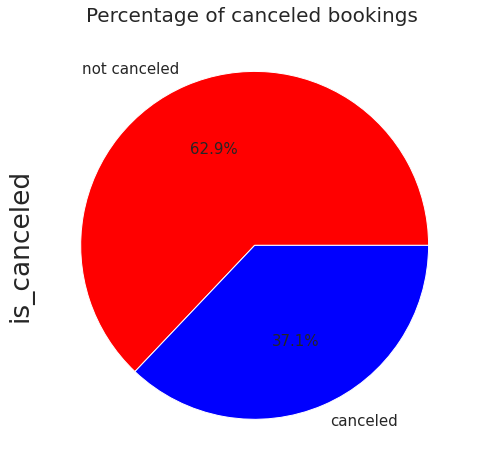

In [83]:
canceled_bookings.plot(kind='pie',autopct ='%1.1f%%',figsize =(8,8),fontsize= 15,colors=['red' ,'blue'],radius=1,labels=['not canceled','canceled'])

plt.title('Percentage of canceled bookings ',fontsize = 20)
plt.show()

# As we can see more than 37% of bookings where canceled.

# **Which segment brings in the most of the bookings?**




In [84]:
# creating a plot function

def plot(x, y, x_label=None,y_label=None, title=None, figsize=(7,5), type='bar',colors=[]):
  
    sns.set_style('darkgrid')
    
    fig, ax = plt.subplots(figsize=figsize)
    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    
    if x_label != None:
        ax.set_xlabel(x_label)
    
    if y_label != None:
        ax.set_ylabel(y_label)
        
    if title != None:
        ax.set_title(title)
    
    if type == 'bar':
        sns.barplot(x,y, ax = ax)
    elif type == 'line':
        sns.lineplot(x,y, ax = ax, sort=False)
        
    
    plt.show()

In [85]:
# creating a function get_count


def get_count(series, limit=None):
 
    if limit != None:
        series = series.value_counts()[:limit]
    else:
        series = series.value_counts()
    
    x = series.index
    y = series/series.sum()*100
    
    return x.values,y.values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



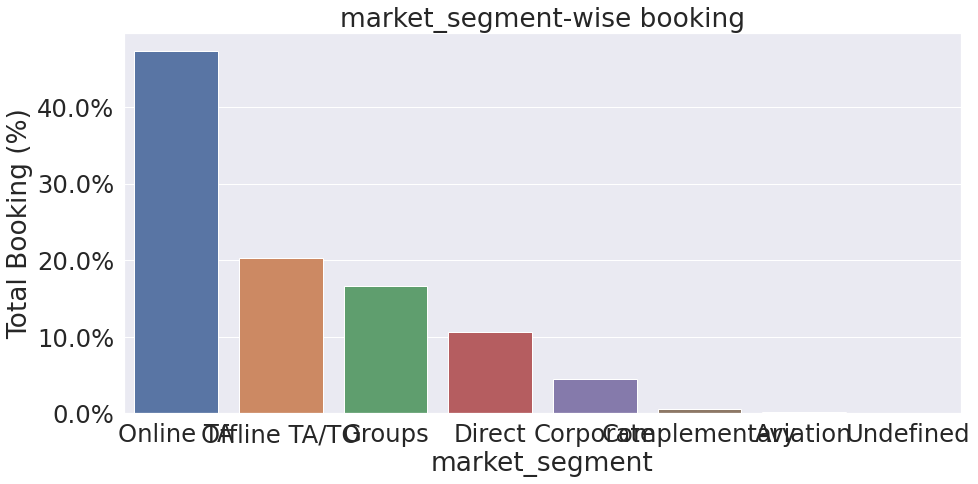

In [86]:
# plot bar chart 
x,y = get_count(ds['market_segment'])
plot(x,y, x_label='market_segment', y_label='Total Booking (%)', title='market_segment-wise booking', figsize=(15,7),colors=['black','red','green','blue','orange','yellow','pink','brown'])

# Online Travel Agents followed by Ofline Travel Agents brings in most of the booking

# **Which is the top country from where most booking are coming?**

In [87]:
# select the bookings which was not cancelled
confirm_bookings = hotel_booking_raw_ds[hotel_booking_raw_ds['is_canceled']==0]

In [88]:
# Number of bookings fro each country store in one variable
get_count= confirm_bookings['country'].value_counts() 

In [89]:
# Top 15 counties which has highest amount of hotel bookings
get_count.head(15)

PRT    21071
GBR     9676
FRA     8481
ESP     6391
DEU     6069
IRL     2543
ITA     2433
BEL     1868
NLD     1717
USA     1596
BRA     1394
CHE     1302
AUT     1033
CN      1025
SWE      797
Name: country, dtype: int64

In [90]:
Bookings_from_country = get_count.head(15)
country_names = ['Portugal','United Kingdom','France','Spain','Germany','Ireland','Italy','Belgium','Netherlands','USA','Brazil','Switzerland','Austria','China','Sweden']

Text(0.5, 1.0, 'Hotel Bookings across the contries')

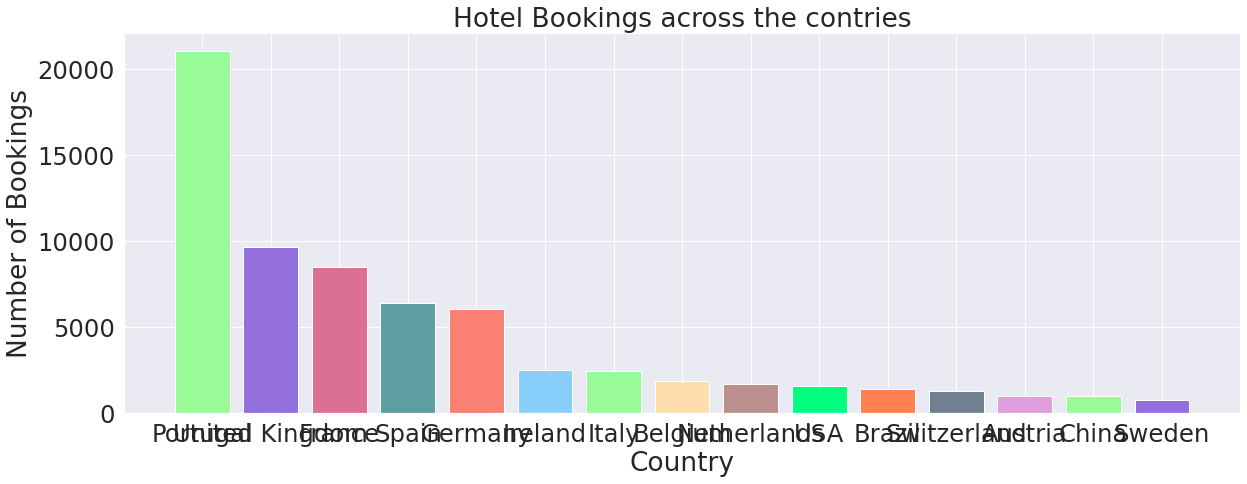

In [91]:
plt.figure(figsize=(20,7))
plt.bar(country_names,Bookings_from_country,color = ['palegreen','mediumpurple','palevioletred','cadetblue','salmon','lightskyblue','palegreen','navajowhite','rosybrown','springgreen','coral','slategray','plum'])
plt.xlabel('Country')
plt.ylabel('Number of Bookings')
plt.title('Hotel Bookings across the contries')

### or

In [92]:
ds_not_canceled = ds[ds['is_canceled'] == 0]

In [93]:
# show on map
temp = ds_not_canceled['country'].value_counts().reset_index().rename(columns={'index':'country','country':'count'})
guest_map = px.choropleth(temp,locations=temp['country'],color=np.log(temp['count']), hover_name=temp['country'], 
                          color_continuous_scale=px.colors.sequential.Plasma,title="Home country of guests")

guest_map.show()


# Portugal is the top country from where most hotel bookings are coming.

# **What is most preffered Meal type ?**

In [94]:
meal_type = ['Bed and Breakfast', 'Half Board','Self Catering','Undefined','Full Board']
meal_count= confirm_bookings['meal'].value_counts()

In [95]:
# Percentage of meal type count.
percentage_meal_count = confirm_bookings['meal'].value_counts(normalize= True)*100
percentage_meal_count

BB           76.896469
HB           12.610755
SC            8.892318
Undefined     1.174733
FB            0.425724
Name: meal, dtype: float64

Text(0.5, 1.0, 'Most demandding Meal Types')

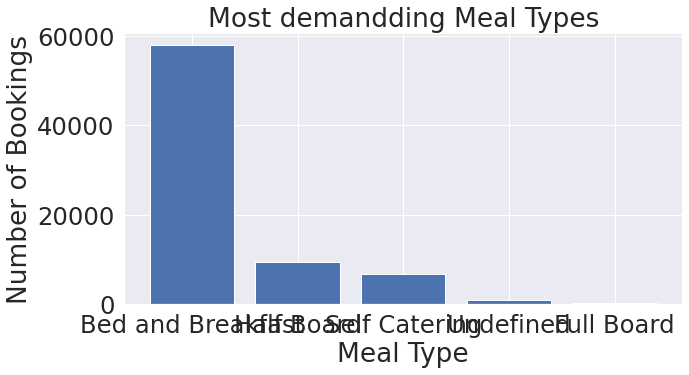

In [96]:
# Visualisation of percentage meal count
plt.figure(figsize=(10,5))
plt.bar(meal_type, meal_count)
plt.xlabel('Meal Type')
plt.ylabel('Number of Bookings')
plt.title('Most demandding Meal Types')

# Bed and Breakfast id most preffered meal

# **Which is the most trending months for hotel booking?**

In [97]:
# creating a data frame with the bookings which did not get canceled

ds_not_canceled = ds[ds['is_canceled'] == 0]

In [98]:
# plot a line plot for month of arrival

new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
             'October', 'November', 'December']

sorted_months = ds_not_canceled['arrival_date_month'].value_counts().reindex(new_order)

x = sorted_months.index
y = sorted_months/sorted_months.sum()*100

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



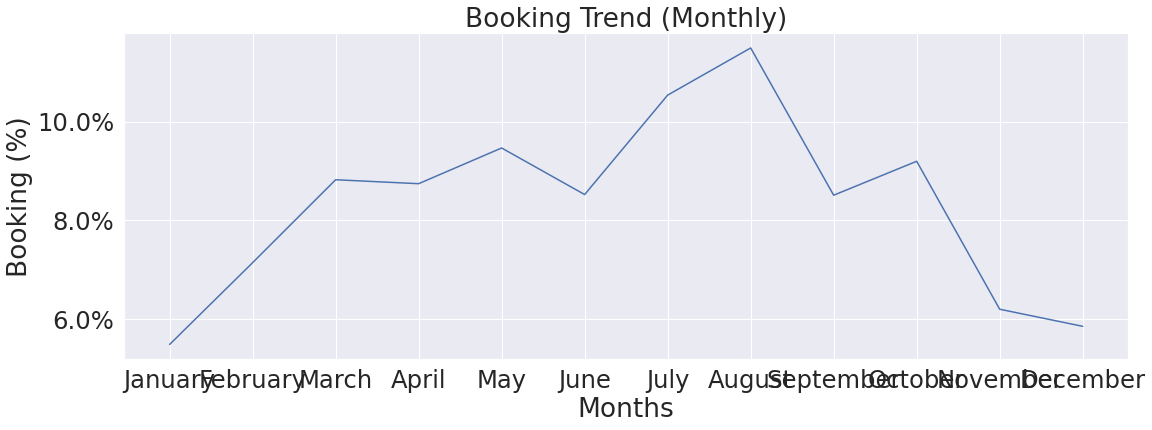

In [99]:
#sns.lineplot(x, y)
plot(x, y, x_label='Months', y_label='Booking (%)', title='Booking Trend (Monthly)', type='line', figsize=(18,6))

Text(0.5, 1.0, 'Number of Bookings in each Months')

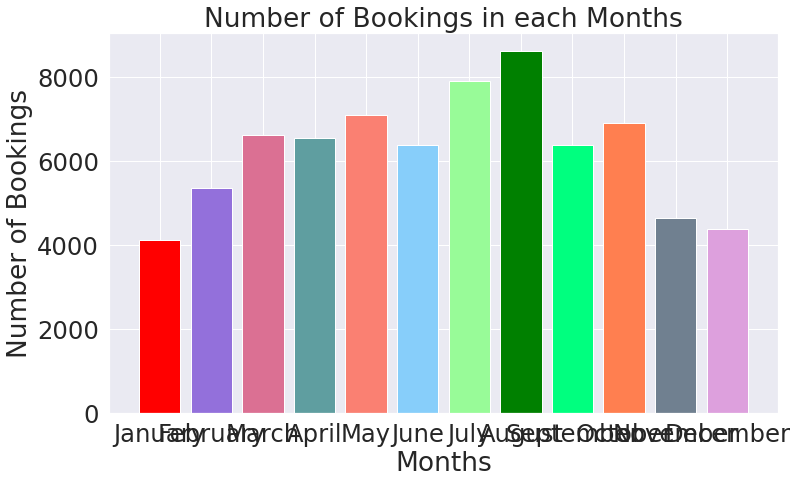

In [100]:
# Bar plot for months vs Number of Bookings
x_axis_data = sorted_months.index
y_axis_data = sorted_months
plt.figure(figsize=(12,7))
plt.bar(x_axis_data,y_axis_data, color = ['red','mediumpurple','palevioletred','cadetblue','salmon','lightskyblue','palegreen','green','springgreen','coral','slategray','plum'])
plt.xlabel('Months')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings in each Months')

# Month of August is the most trending months for the hotel booking.

# **How long the peoples stayed in the hotel?**#

In [101]:
def get_count(series, limit=None):
 
    if limit != None:
        series = series.value_counts()[:limit]
    else:
        series = series.value_counts()
    
    x = series.index
    y = series/series.sum()*100
    
    return x.values,y.values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



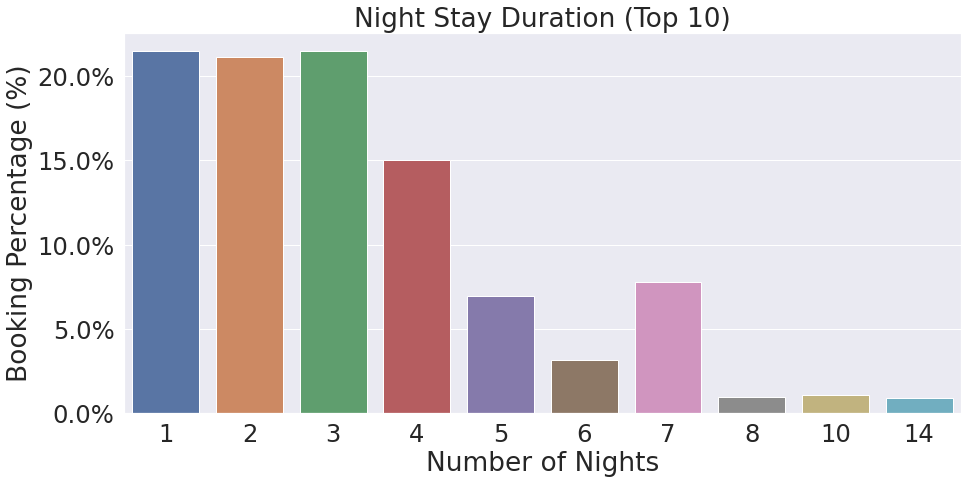

In [102]:
# plotting a bar plot for booking percentage to night stay duration.

total_nights = ds_not_canceled['stays_in_weekend_nights']+ ds_not_canceled['stays_in_week_nights']
x,y = get_count(total_nights, limit=10)

plot(x,y, x_label='Number of Nights', y_label='Booking Percentage (%)', title='Night Stay Duration (Top 10)', figsize=(15,7))


# More than 60% of guests comes under 1, 2 and 3 night stays options.

# **Which was the most booked accommodation type (Single, Couple, Family)?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



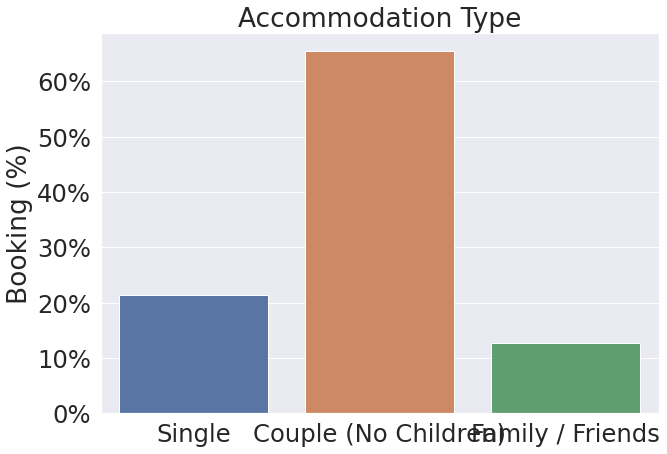

In [103]:
# for single, couple, multiple and family

single   = ds_not_canceled[(ds_not_canceled.adults==1) & (ds_not_canceled.children==0) & (ds_not_canceled.babies==0)]
couple   = ds_not_canceled[(ds_not_canceled.adults==2) & (ds_not_canceled.children==0) & (ds_not_canceled.babies==0)]
family   = ds_not_canceled[ds_not_canceled.adults + ds_not_canceled.children + ds_not_canceled.babies > 2]


# the list of Category names, and their total percentage
names = ['Single', 'Couple (No Children)', 'Family / Friends']
count = [single.shape[0],couple.shape[0], family.shape[0]]
count_percent = [x/ds_not_canceled.shape[0]*100 for x in count]


# plot
plot(names,count_percent,  y_label='Booking (%)', title='Accommodation Type', figsize=(10,7))

# Couple (or 2 adults) is the most popular accommodation type. So hotels can make plans accordingly

# **Ploting the heatmap**

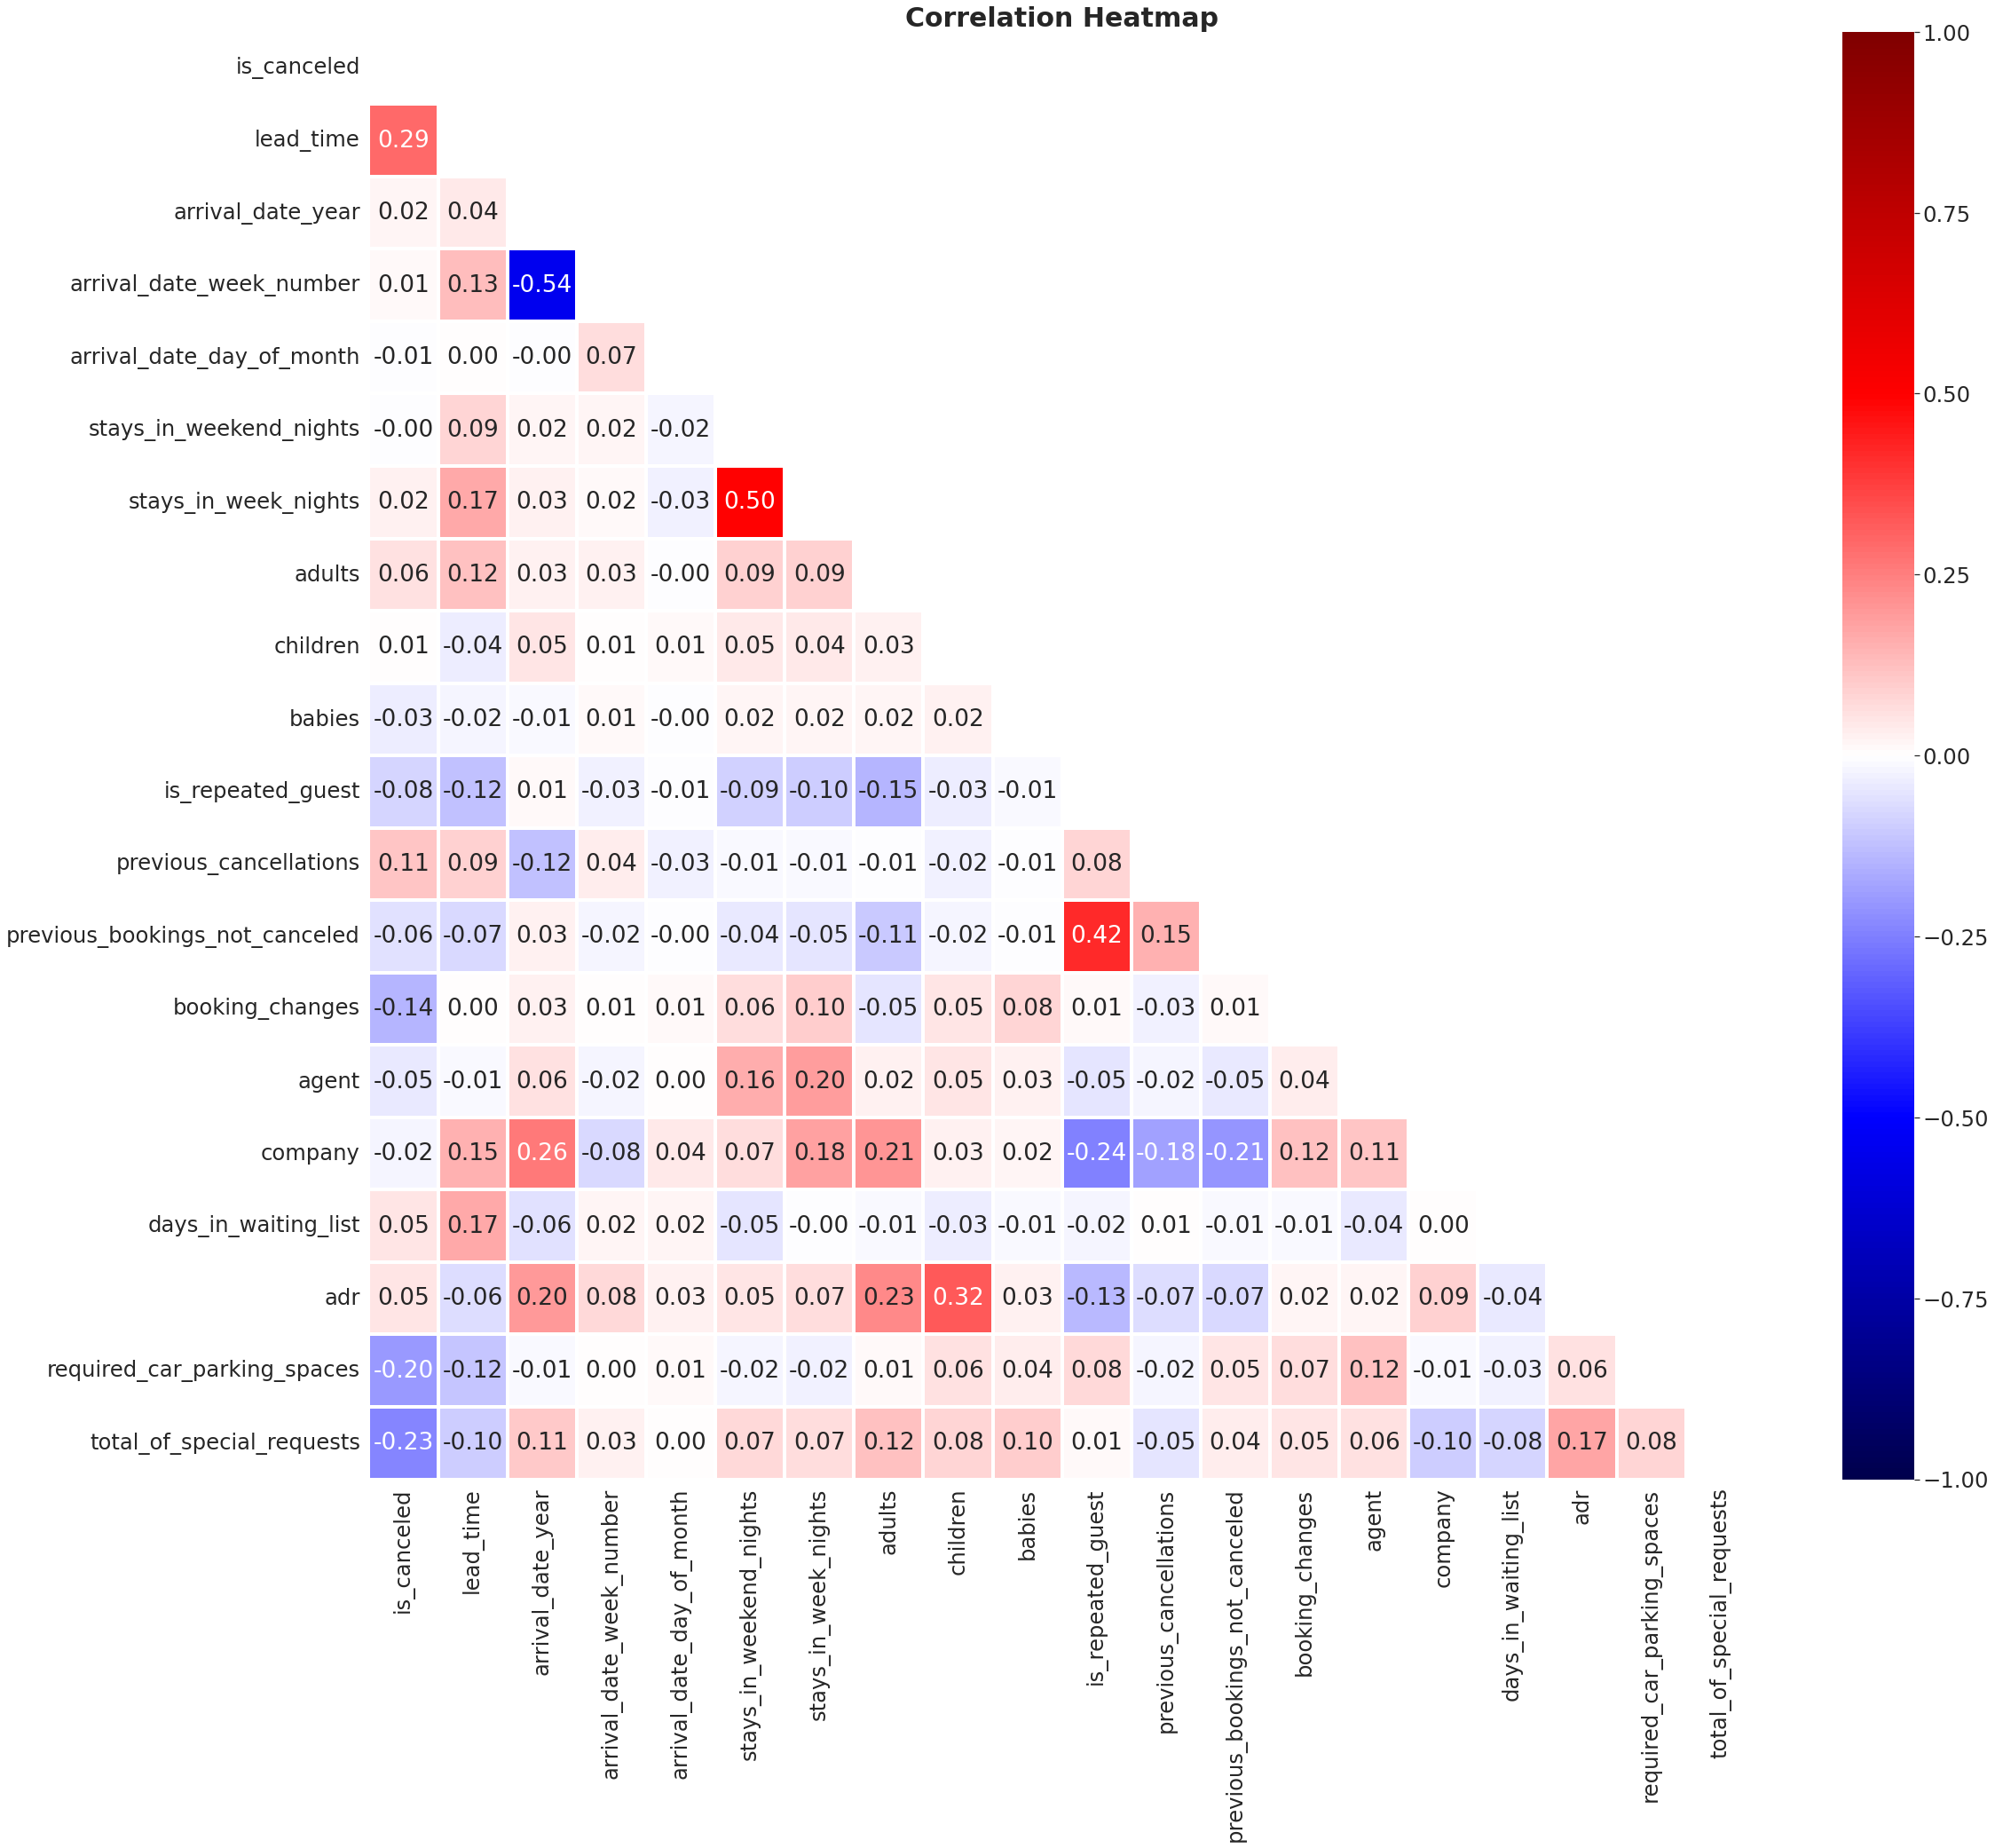

In [104]:
corr_matrix = hotel_booking_raw_ds.corr()
sns.set(style='white',font_scale=2.2)
fig = plt.figure(figsize=[35,30])
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(150, 0, as_cmap=True)
sns.heatmap(corr_matrix,cmap='seismic',linewidth=3,linecolor='white',vmax = 1, vmin=-1,mask=mask, annot=True,fmt='0.2f')
plt.title('Correlation Heatmap', weight='bold',fontsize=30)
plt.savefig('heatmap.png',transparent=True, bbox_inches='tight')

### or

In [ ]:
# Ploting the heatmap to see correlation with columns


fig, ax = plt.subplots(figsize=(35,25))
sns.heatmap(ds.corr(), annot=True, ax=ax);

#Correlation Conclusion:
# 1. adr and children are positive correlated by 33%
#2. It can be observed arrival_date_week_number and arrival_date_year are 54% negative correlated
#3. previous_bookings_not_cancelled and is_repeated_guest are 42% positive correleated


# **Average Daily Rate (ADR) comparision of city hotel and resort hotel.**

In [ ]:
# lineplot of ADR

plt.figure(figsize=(12,8))
sns.lineplot(x = 'arrival_date_month', y = 'adr', hue= 'hotel', data = ds_not_canceled)

# Average Daily Rate (ADR) for the months of July and August are strikingly more for the Resort Hotel than the City Hotel.

# **What is the relation of deposits to the booking cancellation?**

In [ ]:
# counting refundable deposits

ds[ds.deposit_type == 'Refundable'].deposit_type.count()

In [ ]:
# ploting count plot

fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.title("Booking Canceled or not by Deposit type")
sns.countplot(x='deposit_type',data=ds ,hue='is_canceled')

# No deposit cancellations are high compared to other categories

# **What is the relationship between lead time and cancellation?**

In [ ]:
a = ds.groupby("lead_time")['is_canceled'].describe()
a

In [ ]:
fig = plt.gcf()
fig.set_size_inches(12, 8)
a = ds.groupby("lead_time")['is_canceled'].describe()
sns.scatterplot(x=a.index, y=a["mean"] * 100)

# **Conclusion :**
1. More than 37% of bookings where canceled.
2. Online Travel Agents followed by Ofline Travel Agents brings in most of the bookings.
3. Portugal is the top country from where most hotel bookings are coming.
4.Bed and Breakfast id most preffered meal
4. Month of August is the most trending months for the Hotel Booking.
5. More than 60% of guests comes under 1,2 and 3 night stays options.
6. Couple (or 2 adults) is the most popular accommodation type. So hotels can make plans accordingly.
7. ### Ploting the heatmap
   -Adr and children are positive correlated by 33%.

   -It can be observed arrival_date_week_number and arrival_date_year are 54%   negative correlated.

  -Previous_bookings_not_cancelled and is_repeated_guest are 42% positive    correleated.
8. Average Daily Rate (ADR) for the months of July and August are strikingly more for the Resort Hotel than the City Hotel.
9. No deposit cancellations are high compared to other categories but these should not be discouraged per se as bookings in this category are also very high compared to non refundable type bookings.
10. it is observed that lead time has a positive correlation with cancellation.